In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train = pd.read_csv('/content/drive/MyDrive/data/Wine/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/Wine/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/data/Wine/sample_submission.csv')

In [10]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [11]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [56]:
train['quality'].value_counts()

6.0    2416
5.0    1788
7.0     924
4.0     186
8.0     152
3.0      26
9.0       5
Name: quality, dtype: int64

In [12]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [14]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [15]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
le = LabelEncoder()
le.fit(train['type'])

LabelEncoder()

In [18]:
le.classes_

array(['red', 'white'], dtype=object)

In [19]:
 result = le.transform(train['type'])

In [20]:
train.drop(['type'], axis=1, inplace = True)
train['type'] = result

In [25]:
 result = le.transform(test['type'])

In [27]:
test.drop(['type'], axis=1, inplace=True)
test['type'] = result

In [21]:
train['type'].head()

0    1
1    0
2    1
3    1
4    1
Name: type, dtype: int64

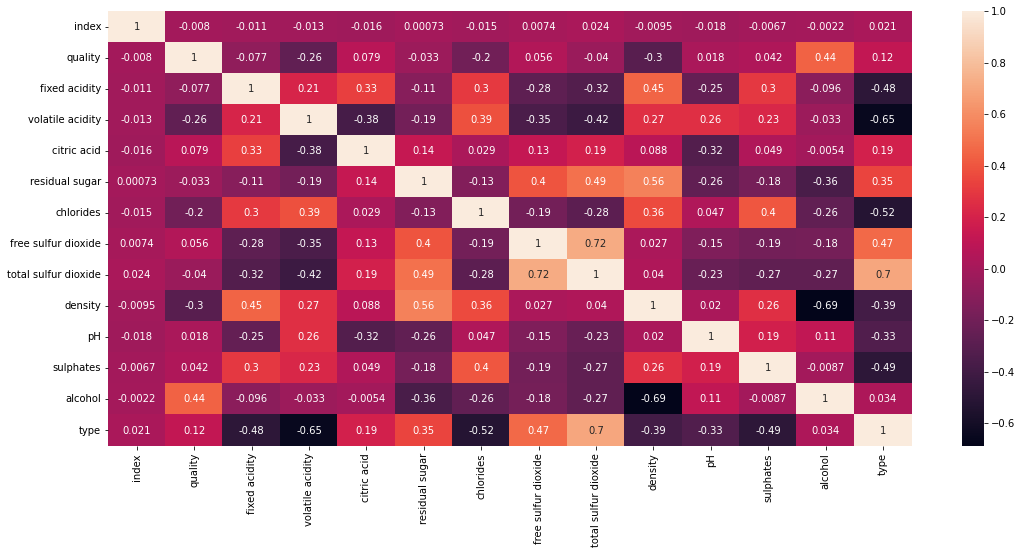

In [22]:
plt.figure(figsize=(18,8))
sns.heatmap(train.corr(), annot=True)

In [28]:
data = pd.concat([train, test], sort=False)

In [30]:
for col in train:
  col1 = train['quality']
  col2 = train[col]
  cor = col1.corr(col2)
  if(abs(cor)<0.2):
     data.drop(col, axis=1, inplace=True)

In [32]:
data.tail()

,quality,volatile acidity,density,alcohol
995,NaN,0.59,0.99744,9.7
996,NaN,0.15,0.99420,9.8
997,NaN,0.66,0.99710,9.2
998,NaN,0.42,0.99476,10.9
999,NaN,0.21,0.99450,11.4


In [34]:
train = data[:len(train)]
test = data[len(train):]
test.drop('quality', axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [49]:
y_train = train['quality']
X_train = train.drop('quality', axis=1)
X_test = test

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.fit_transform(X_test)

In [51]:
X_train

,volatile acidity,density,alcohol
0,0.695,0.99432,10.2
1,0.610,0.99690,9.5
2,0.210,0.99176,10.9
3,0.210,0.99390,10.8
4,0.400,0.99550,10.9
...,...,...,...
5492,0.150,0.99320,10.1
5493,0.180,0.99074,11.0
5494,0.150,0.99096,11.3
5495,0.410,0.99195,10.5


In [52]:
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [53]:
y_pred = clf.predict(X_test_scaled)

In [54]:
rfsub = pd.read_csv('/content/drive/MyDrive/data/Wine/sample_submission.csv')
rfsub['quality'] = list(map(int, y_pred))
rfsub.to_csv('rpsu2.csv', index=False)

In [59]:
model = LogisticRegression(max_iter=1000)

In [60]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [61]:
logistic_pred = model.predict(X_test_scaled)

In [63]:
losub = pd.read_csv('/content/drive/MyDrive/data/Wine/sample_submission.csv')
losub['quality'] = list(map(int, logistic_pred))
losub.to_csv('lo.csv', index=False)